<a href="https://colab.research.google.com/github/shyakx/churn_modelling/blob/main/Summative_Intro_to_ml_Steven_Shyaka_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT NAME: THE CHURN PREDICTION**

This notebook explores the implementation of machine learning models for customer churn prediction, applying optimization techniques such as regularization, early stopping, and hyperparameter tuning.

## 1. Load Required Libraries
Import necessary libraries for data processing, visualization, and model training.

****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

****
## 2. Load and Preprocess Dataset
- Load the dataset.
- Drop unnecessary columns to reduce noise.
- Encode categorical variables.
- Scale numerical features to improve model performance.


In [2]:
# Load Dataset
file_path = '/content/Churn_Modelling.csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ['Geography', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target variable
X = df.drop(columns=['Exited'])  # Features
y = df['Exited']  # Target

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

****

## 3. Implement Classical ML Model (Logistic Regression)
- Train a logistic regression model as a baseline.
- Evaluate performance.

In [3]:
# ---- Model 1: Classical Supervised Learning (Logistic Regression) ----
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", log_reg_acc)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000



****

## 4. Implement Basic Neural Network
- Create a simple NN model without optimizations.
- Train and evaluate.

In [4]:
# ---- Model 2: Basic Neural Network ----
nn_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

# Visualize Basic NN Architecture
plot_model(nn_model, to_file='basic_nn.png', show_shapes=True, show_layer_names=True)
display(Image(filename='basic_nn.png'))

# Evaluate Basic NN
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
nn_acc = accuracy_score(y_test, y_pred_nn)
print("Basic Neural Network Accuracy:", nn_acc)
print("Basic Neural Network Report:\n", classification_report(y_test, y_pred_nn))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6851 - loss: 0.6113 - val_accuracy: 0.8012 - val_loss: 0.4590
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8032 - loss: 0.4482 - val_accuracy: 0.8081 - val_loss: 0.4336
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.4263 - val_accuracy: 0.8206 - val_loss: 0.4168
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8193 - loss: 0.4143 - val_accuracy: 0.8331 - val_loss: 0.3998
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8306 - loss: 0.3921 - val_accuracy: 0.8462 - val_loss: 0.3826
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.3799 - val_accuracy: 0.8625 - val_loss: 0.3660
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8516 - loss: 0.3769 - val_accuracy: 0.8650 - val_loss: 0.3545
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8602 - loss: 0.3509 - val_accuracy: 0.8650 - val_

*****
## 5. Implement Optimized Neural Network
- Apply dropout layers, learning rate tuning, and early stopping.
- Evaluate the model.

In [5]:
# ---- Model 3: Optimized Neural Network ----
nn_optimized = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

nn_optimized.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Optimized NN
nn_optimized.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Visualize Optimized NN Architecture
plot_model(nn_optimized, to_file='optimized_nn.png', show_shapes=True, show_layer_names=True)
display(Image(filename='optimized_nn.png'))

# Evaluate Optimized NN
y_pred_nn_opt = (nn_optimized.predict(X_test) > 0.5).astype("int32")
nn_opt_acc = accuracy_score(y_test, y_pred_nn_opt)
print("Optimized Neural Network Accuracy:", nn_opt_acc)
print("Optimized Neural Network Report:\n", classification_report(y_test, y_pred_nn_opt))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5288 - loss: 0.7930 - val_accuracy: 0.8012 - val_loss: 0.4600
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7815 - loss: 0.5047 - val_accuracy: 0.8100 - val_loss: 0.4325
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8076 - loss: 0.4651 - val_accuracy: 0.8219 - val_loss: 0.4236
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.4600 - val_accuracy: 0.8294 - val_loss: 0.4190
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8046 - loss: 0.4472 - val_accuracy: 0.8325 - val_loss: 0.4119
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8170 - loss: 0.4209 - val_accuracy: 0.8388 - val_loss: 0.4034
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8247 - loss: 0.4289 - val_accuracy: 0.8494 - val_loss: 0.3942
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8220 - loss: 0.4187 - val_accuracy: 0.8544 - val_

****
## 6. Model Performance Comparison
- Compare models using confusion matrices and ROC-AUC scores.

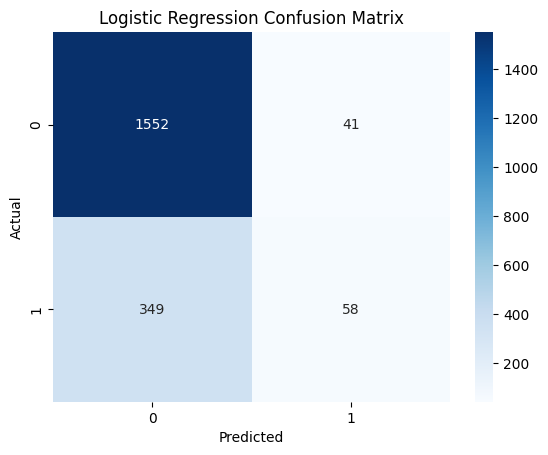

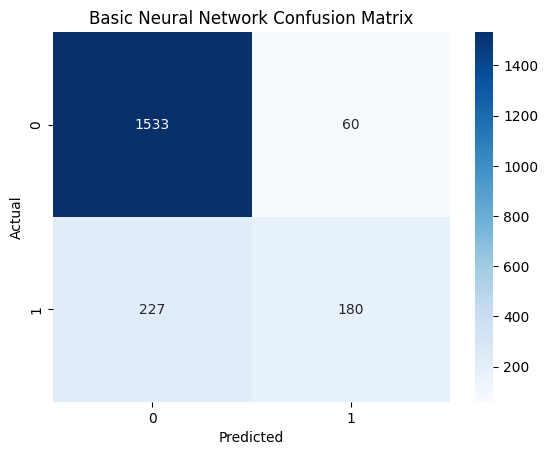

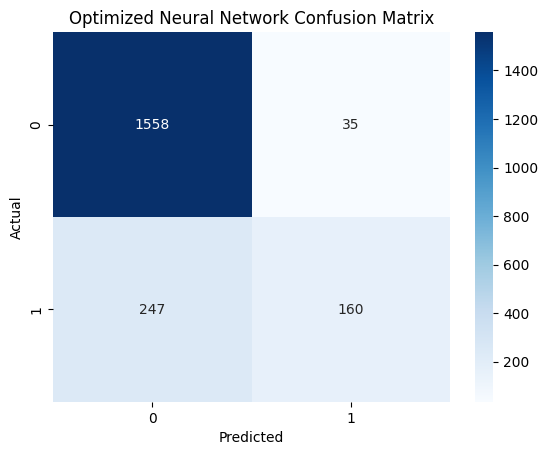

ROC-AUC Scores:
Logistic Regression: 0.558384270248677
Basic Neural Network: 0.7022978294164735
Optimized Neural Network: 0.6855746347271771
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

Sample Predictions:
Instance 1:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------
Instance 2:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------
Instance 3:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------
Instance 4:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------
Instance 5:
  Actual Churn: 0
  Predicted Churn: 0
------------------------------


In [8]:
# ---- Performance Comparison ----
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_nn, "Basic Neural Network Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_nn_opt, "Optimized Neural Network Confusion Matrix")

# ROC-AUC Score Comparison
print("ROC-AUC Scores:")
print("Logistic Regression:", roc_auc_score(y_test, y_pred_log))
print("Basic Neural Network:", roc_auc_score(y_test, y_pred_nn))
print("Optimized Neural Network:", roc_auc_score(y_test, y_pred_nn_opt))

# ---- Predict and Display 5 Instances ----
sample_indices = np.random.choice(len(X_test), 5, replace=False)
X_sample = X_test[sample_indices]
y_actual = y_test.iloc[sample_indices].values
y_pred_sample = (nn_optimized.predict(X_sample) > 0.5).astype("int32")

print("\nSample Predictions:")
for i in range(5):
    print(f"Instance {i+1}:")
    print(f"  Actual Churn: {y_actual[i]}")
    print(f"  Predicted Churn: {y_pred_sample[i][0]}")
    print("-" * 30)